In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
datasets = pd.read_excel('datakelulusanmahasiswa.xls')
datasets

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.5,0.99,TEPAT
375,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,2.97,TEPAT
376,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,3.03,TEPAT
377,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0,3.16,TEPAT


In [4]:
datasets.columns = datasets.columns.str.strip()
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB


In [5]:
print(datasets.isnull().sum())

NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               7
IPK                 3
STATUS KELULUSAN    0
dtype: int64


In [9]:
# memeriksa missing value
print("Missing values dalam dataset:")
print(datasets.isnull().sum())

Missing values dalam dataset:
NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               7
IPK                 3
STATUS KELULUSAN    0
dtype: int64


In [12]:
# Mengubah categorical variables menjadi numerical menggunakan Label Encoding
le = LabelEncoder()
categorical_columns = ['JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH', 'STATUS KELULUSAN']
for col in categorical_columns:
    datasets[col + '_ENCODED'] = le.fit_transform(datasets[col])

In [14]:
# Normalisasi nilai IPS dan IPK
numerical_columns = ['IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8', 'IPK']
datasets_normalized = datasets.copy()
for col in numerical_columns:
    datasets_normalized[col] = (datasets[col] - datasets[col].mean()) / datasets[col].std()


In [16]:
# Feature Engineering
# Menambahkan fitur baru yang mungkin berguna
datasets['RATA_RATA_IPS'] = datasets[['IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8']].mean(axis=1)
datasets['TREND_IPS'] = datasets['IPS 7'] - datasets['IPS 1']  # Melihat tren performa


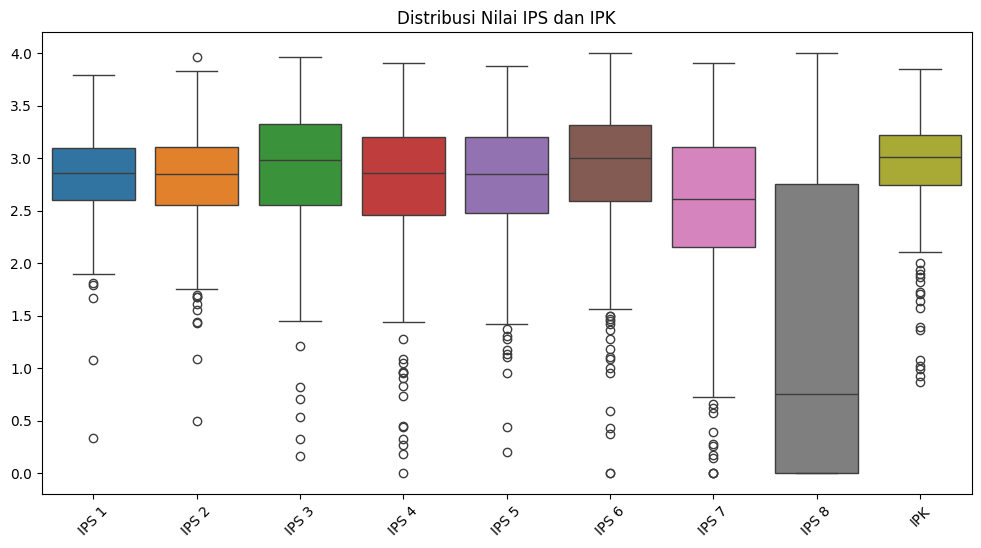

In [18]:
# Visualisasi distribusi data
plt.figure(figsize=(12, 6))
sns.boxplot(data=datasets[['IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8', 'IPK']])
plt.title('Distribusi Nilai IPS dan IPK')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Menyimpan hasil pre-processing
datasets_processed = pd.concat([datasets_normalized[numerical_columns],
                         datasets[categorical_columns + ['RATA_RATA_IPS', 'TREND_IPS']],
                         datasets[[col + '_ENCODED' for col in categorical_columns]]], axis=1)
datasets_processed.to_csv('datakelulusanmahasiswa_processed.csv', index=False)